Pract- 6

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the IRIS dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Accuracy with linear kernel: 1.0
Accuracy with poly kernel: 1.0
Accuracy with rbf kernel: 1.0
Accuracy with sigmoid kernel: 0.3


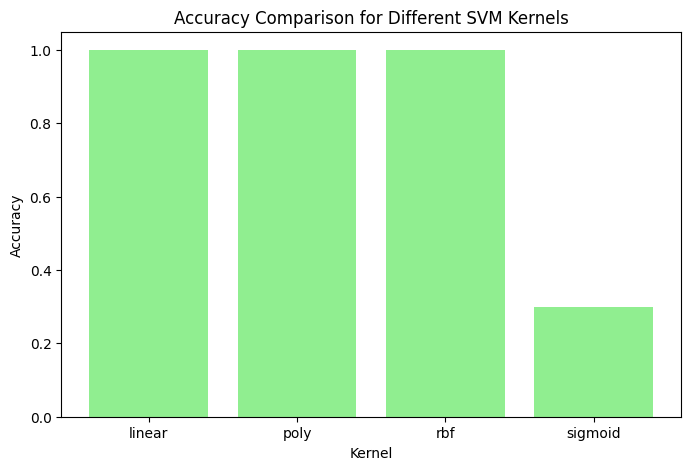

In [2]:
# List of kernels to test
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies = []

# Train and evaluate SVM for each kernel
for kernel in kernels:
    svm_classifier = SVC(kernel=kernel)
    svm_classifier.fit(X_train, y_train)
    y_pred = svm_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Accuracy with {kernel} kernel: {accuracy}")

# Plot the results
plt.figure(figsize=(8, 5))
plt.bar(kernels, accuracies, color='lightgreen')
plt.title("Accuracy Comparison for Different SVM Kernels")
plt.xlabel("Kernel")
plt.ylabel("Accuracy")
plt.show()


Pract - 7


In [ ]:
# A
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load country data (example: a CSV file with columns like 'Country', 'GDP', 'Population')
country_data = pd.read_csv('country_data.csv')  # Replace with your file path

# Extract relevant features for clustering
X = country_data[['GDP', 'Population']]  # Select features relevant to clustering

# Implement K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Add cluster labels to the data
country_data['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP', y='Population', hue='Cluster', data=country_data, palette='viridis')
plt.title('K-Means Clustering of Country Data')
plt.xlabel('GDP')
plt.ylabel('Population')
plt.show()


In [ ]:
# B
from sklearn.cluster import AgglomerativeClustering

# Implement Agglomerative Clustering with 3 clusters
agg_clustering = AgglomerativeClustering(n_clusters=3)
country_data['Agglomerative_Cluster'] = agg_clustering.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP', y='Population', hue='Agglomerative_Cluster', data=country_data, palette='coolwarm')
plt.title('Agglomerative Clustering of Country Data')
plt.xlabel('GDP')
plt.ylabel('Population')
plt.show()


Pract - 8


In [4]:
# Task - 1
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Load the IRIS dataset
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# Encode the target variable
label_encoder = LabelEncoder()
iris['class'] = label_encoder.fit_transform(iris['class'])

# Split data
X = iris.drop('class', axis=1)
y = iris['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create ANN model
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 output neurons for 3 classes
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")


d:\MLwork\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5482 - loss: 0.9826 - val_accuracy: 0.5000 - val_loss: 0.9385
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7802 - loss: 0.8088 - val_accuracy: 0.8333 - val_loss: 0.8122
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8002 - loss: 0.7101 - val_accuracy: 0.8750 - val_loss: 0.7180
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8676 - loss: 0.5713 - val_accuracy: 0.8333 - val_loss: 0.6360
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8394 - loss: 0.5262 - val_accuracy: 0.8333 - val_loss: 0.5729
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8354 - loss: 0.4474 - val_accuracy: 0.8333 - val_loss: 0.5256
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8065 - loss: 0.4344 - val_accuracy: 0.8333 - val_loss: 0.4832
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8462 - loss: 0.3954 - val_accuracy: 0.8750 - val_loss

In [5]:
# Task -2
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28*28) / 255.0  # Flatten and normalize
X_test = X_test.reshape(-1, 28*28) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Create ANN model
model = Sequential([
    Dense(128, input_shape=(28*28,), activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 output neurons for 10 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8619 - loss: 0.4654 - val_accuracy: 0.9557 - val_loss: 0.1504
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9628 - loss: 0.1251 - val_accuracy: 0.9667 - val_loss: 0.1145
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9756 - loss: 0.0783 - val_accuracy: 0.9703 - val_loss: 0.0975
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9816 - loss: 0.0596 - val_accuracy: 0.9688 - val_loss: 0.1043
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9873 - loss: 0.0429 - val_accuracy: 0.9696 - val_loss: 0.1029
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9891 - loss: 0.0343 - val_accuracy: 0.9744 - val_loss: 0.1005
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9904 - loss: 0.0288 - val_accuracy: 0.9730 - val_loss: 0.1000
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9926 - loss: 0.0232 - 

In [6]:
# Task-3
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Flatten

# Load and preprocess data
max_features = 10000  # Vocabulary size
max_len = 200  # Maximum review length

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

# Create ANN model
model = Sequential([
    Embedding(max_features, 128, input_length=max_len),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 29s 2us/step
Epoch 1/5


d:\MLwork\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 50ms/step - accuracy: 0.7012 - loss: 0.5289 - val_accuracy: 0.8536 - val_loss: 0.3347
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.9753 - loss: 0.0771 - val_accuracy: 0.8438 - val_loss: 0.4756
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.9977 - loss: 0.0097 - val_accuracy: 0.8472 - val_loss: 0.6181
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 47ms/step - accuracy: 0.9999 - loss: 0.0012 - val_accuracy: 0.8442 - val_loss: 0.6625
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 1.0000 - loss: 2.7577e-04 - val_accuracy: 0.8466 - val_loss: 0.7104
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8435 - loss: 0.6895
Test Accuracy: 0.8445199728012085


Pract -9 


In [7]:
# Task-1
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0  # Normalize and reshape
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Create CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")


d:\MLwork\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9048 - loss: 0.3153 - val_accuracy: 0.9848 - val_loss: 0.0515
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9847 - loss: 0.0492 - val_accuracy: 0.9880 - val_loss: 0.0403
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9903 - loss: 0.0310 - val_accuracy: 0.9920 - val_loss: 0.0319
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9930 - loss: 0.0214 - val_accuracy: 0.9897 - val_loss: 0.0400
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9951 - loss: 0.0150 - val_accuracy: 0.9895 - val_loss: 0.0388
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9968 - loss: 0.0102 - val_accuracy: 0.9903 - val_loss: 0.0364
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9973 - loss: 0.0076 - val_accuracy: 0.9917 - val_loss: 0.0412
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9978 - loss: 

In [9]:
# Task-2 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to the training and testing directories
train_dir = 'D:/MLwork/.venv/ML_LAB/Fruits Classification/train'
test_dir = 'D:/MLwork/.venv/ML_LAB/Fruits Classification/test'

# Data generators without pre-processing
train_gen = ImageDataGenerator()
test_gen = ImageDataGenerator()

train_data = train_gen.flow_from_directory(train_dir, target_size=(100, 100), batch_size=32, class_mode='categorical')
test_data = test_gen.flow_from_directory(test_dir, target_size=(100, 100), batch_size=32, class_mode='categorical')

# Create CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(train_data.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_data, epochs=10, validation_data=test_data)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc}")


Found 9700 images belonging to 5 classes.
Found 100 images belonging to 5 classes.
Epoch 1/10


d:\MLwork\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 33/304 ━━━━━━━━━━━━━━━━━━━━ 1:56 431ms/step - accuracy: 0.2277 - loss: 291.4297

KeyboardInterrupt: 

Pract-1
0

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# 1. Load the IMDB dataset
max_features = 10000  # Limit the vocabulary size
maxlen = 500  # Maximum length of input sequences

# Load the dataset, only keeping the most frequent words
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences to ensure uniform input length
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

# Convert labels to categorical (0 = negative, 1 = positive)
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

# 2. Build the RNN model
model = Sequential()

# Embedding layer to map words to dense vectors
model.add(Embedding(input_dim=max_features, output_dim=128, input_length=maxlen))

# Simple RNN layer (the Recurrent part)
model.add(SimpleRNN(64, return_sequences=False))

# Dropout to prevent overfitting
model.add(Dropout(0.5))

# Output layer (binary classification)
model.add(Dense(2, activation='softmax'))

# 3. Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 4. Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# 5. Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

# 6. Making Predictions (Example)
# Predict sentiment of a sample review
sample_review = X_test[0:1]  # You can replace this with your own test review
prediction = model.predict(sample_review)
predicted_class = 'positive' if prediction[0][1] > prediction[0][0] else 'negative'
print(f"Predicted sentiment: {predicted_class}")


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 61s 151ms/step - accuracy: 0.5909 - loss: 0.6636 - val_accuracy: 0.5804 - val_loss: 0.6632
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 44s 112ms/step - accuracy: 0.5789 - loss: 0.6895 - val_accuracy: 0.6636 - val_loss: 0.6011
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 45s 114ms/step - accuracy: 0.7267 - loss: 0.5429 - val_accuracy: 0.7850 - val_loss: 0.4750
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 45s 116ms/step - accuracy: 0.7833 - loss: 0.4765 - val_accuracy: 0.6805 - val_loss: 0.5832
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 45s 114ms/step - accuracy: 0.7545 - loss: 0.5053 - val_accuracy: 0.7928 - val_loss: 0.4660
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.7913 - loss: 0.4692
Test Accuracy: 0.7928400039672852
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Predicted sentiment: negative
